
### Exploratory data analysis 
<br>
Suvin S 

For this project we analyze 911 call data from Kaggle https://www.kaggle.com/mchirico/montcoalert 
<br>
This data countains the following fields:
<br>
lat      - String variable, Latitude
<br>
lng      - String variable, Longitude 
<br>
desc     - String varible, Description of Emergency call
<br>
zip      - String varible, zipcode
<br>
title    - String varible, title
<br>
timeStamp- String variable yyyy:mm:dd hh:mm:ss
<br>
twp      - String variable, Township
<br>
addr     - String variable, Address
<br>
e        - String variable, dummy variable (always 1)

This dataset from Kaggle contains information of the number of 911 calls received. Location, city, zip, address,reason of the call and the time of the accident can be used to predict and help prevent future accidents. Visualizing data can help understand it better. The goal of this assignment was to try and make sense of the information given in this dataset.

## Data and Setup

_________________________________________________
#### Libraries for data analysis and manipulation 

In [1]:
import pandas as pd
import numpy as np

#### Import visualization libraries and set %matplotlib inline. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read in the csv file as a dataframe called df 

In [3]:
df = pd.read_csv('911.csv')

**check the head of the dataframe**

In [4]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


** Using lambda function to get only the main reason from df['title'] **

In [5]:
# creating a new column and adding it to the DataFrame
df['reason'] = df['title'].apply(lambda r: r.split(':')[0])

** What are the most common reason for 911 calls? **

In [6]:
list_of_counts_for_every_reason = []

for i in range (0,3):
    dummy = 0 # dummy variable
    dummy = df['reason'].value_counts()[i] # get the count of that particular reason
    list_of_counts_for_every_reason.append(dummy) # put it in a list

In [7]:
print(list_of_counts_for_every_reason)

[161441, 116065, 48919]


In [8]:
l= 'EMS','Traffic','Fire'
sizes = 161441, 116065, 48919
c = ['maroon','purple','gold']
e = (0.1, 0.1, 0.1)

([<matplotlib.patches.Wedge object at 0x1a1ecd3fd0>, <matplotlib.patches.Wedge object at 0x1a1ece5ad0>, <matplotlib.patches.Wedge object at 0x1a1ecf5590>], [Text(-1.1851500812803908, -0.18820011913142837, 'EMS'), Text(1.1415769154120863, -0.36986774149447843, 'Traffic'), Text(0.3503517974989419, 1.147716697617169, 'Fire')], [Text(-0.6913375474135611, -0.10978340282666653, '49.5%'), Text(0.665919867323717, -0.21575618253844575, '35.6%'), Text(0.20437188187438277, 0.6695014069433487, '15.0%')])


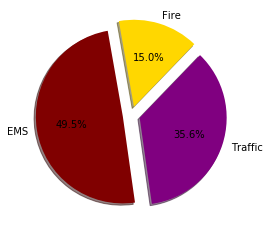

In [9]:
print(plt.pie(sizes, explode = e, labels = l, colors = c, autopct='%1.1f%%', shadow=True, startangle=100))

As shown in the pie chart, the most common reason for 911 calls was EMS, followed by Traffic and fire. Medical emergencies are usually more common than traffic or fire accidents. This is evident as shown in the plot above. 

#### Which town has the highest number of calls and what is the most common reason for the call?
<br>
Citation - setting x-axis https://plot.ly/matplotlib/axes/
           rotating the x-axis 

AxesSubplot(0.0117222,0.0232222;0.985182x0.970778)


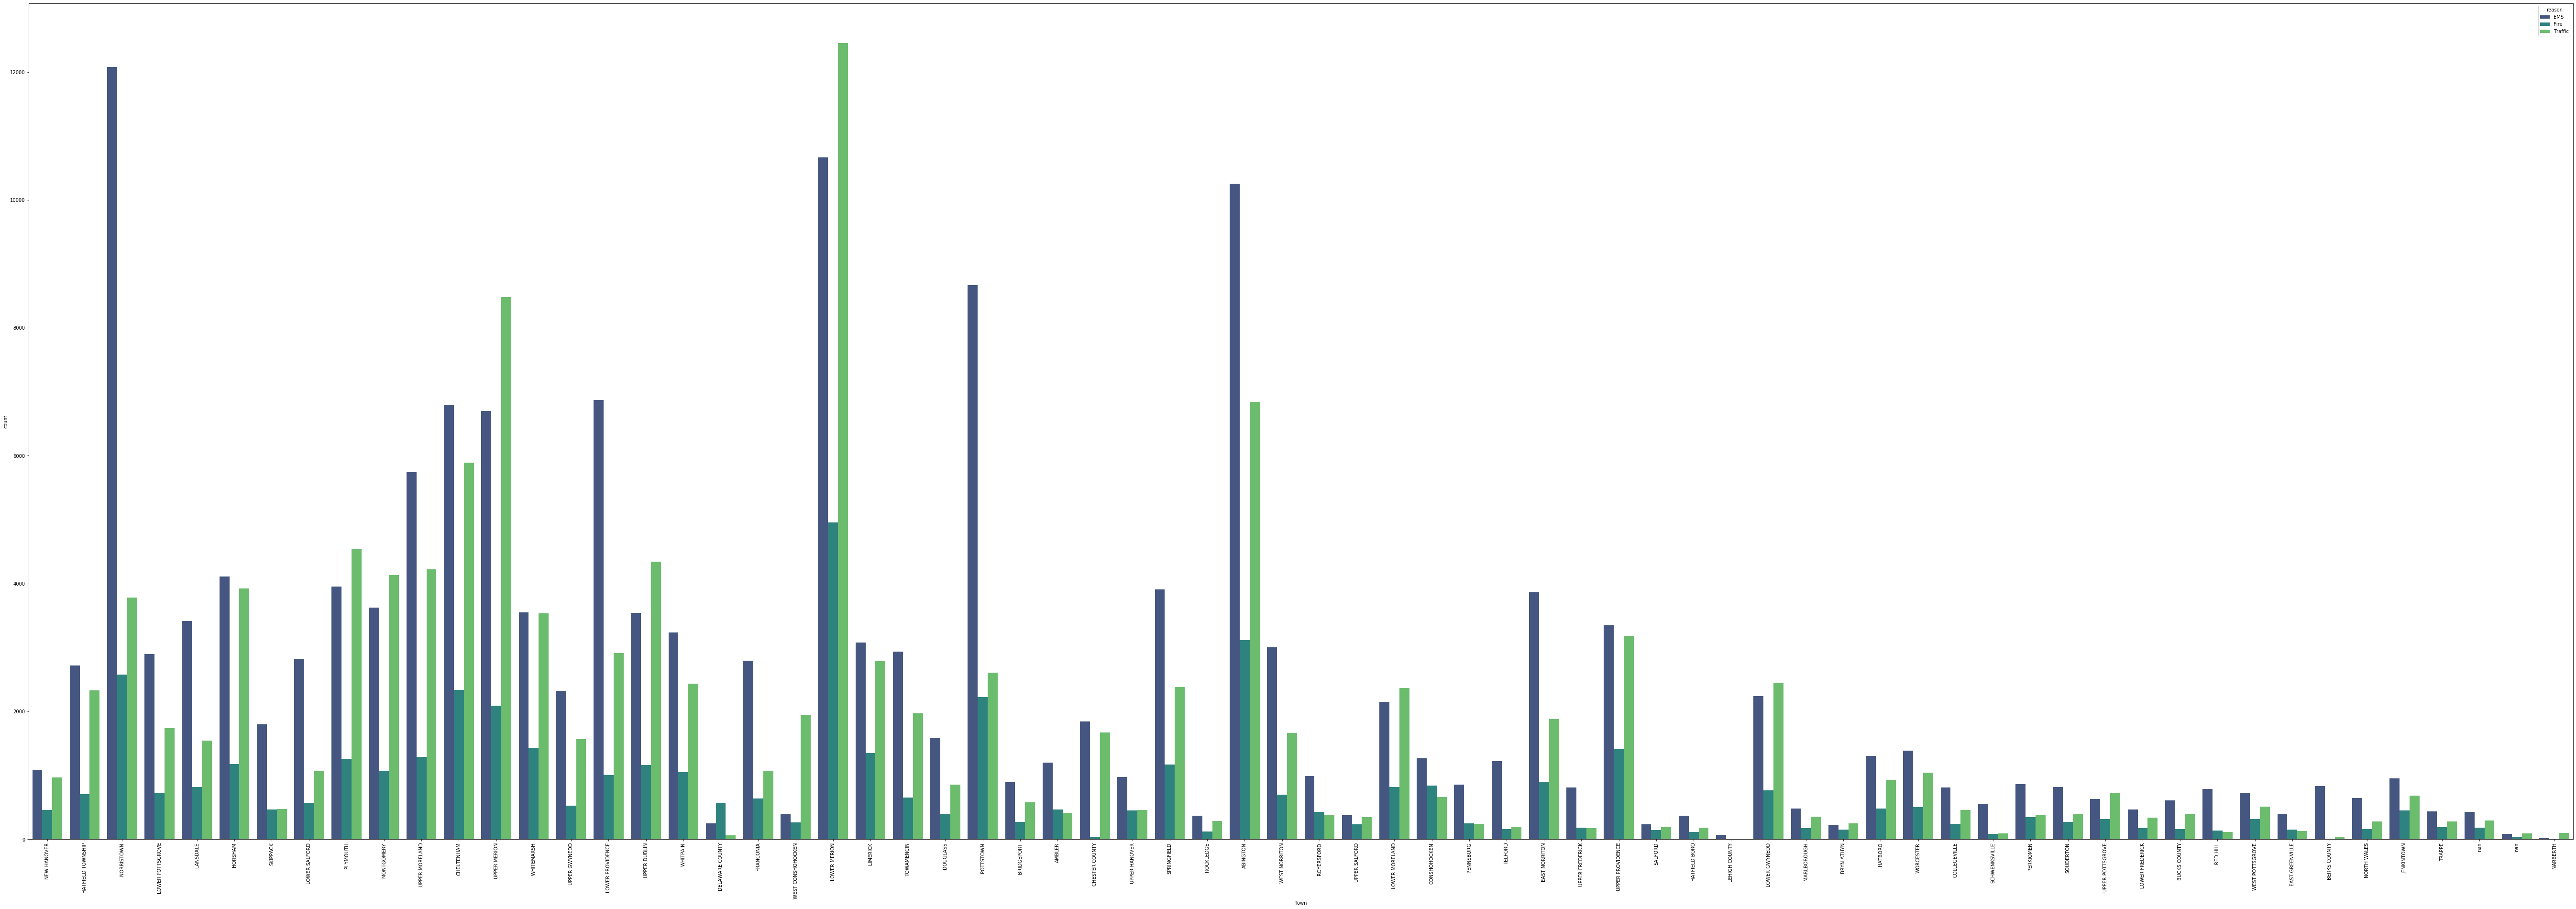

In [10]:
plt.figure(figsize=(75,25))
num_calls_each_town = sns.countplot(x='twp',data=df,hue = 'reason',palette = 'viridis')
plt.tight_layout()
list2 = []
for town in range(0, 326310):
    a = 0  
    j = 0  # counter 
    j = df['twp'][town] # get that particular town
    for _ in list2:
        if j == _:
            a = 1
    if a == 0:
        list2.append(j) # put it in a list
        
num_calls_each_town.set_xlabel('Town')
num_calls_each_town.set_xticklabels(rotation=90,labels=list2)
print(num_calls_each_town)

The plot above shows total count of calls for all towns and the reason behind the call.
<br>
Norristown has the highest number of EMS calls. This tells us that this town might have a small hospital or the town might have elderly population, as they are the ones who usually need medical attention. 
<br>
Lower merion has more calls because of fire. If the town has fast access to fire brigade's the risk of people living in this town can go down. 
<br>
Lower Merion also has a high number of calls because of traffic related incidents. This can tell us that the town needs strict control over their transportation system to prevent such calls.

#### The timestamp column can help us get the date and time
<br>
The main goal would be to visualize how time and date correlate with the reason of the calls
<br>
Citation - extracting hour, month and other objects - https://stackoverflow.com/questions/25754405/how-to-extract-hours-and-minutes-from-a-datetime-datetime-object

In [11]:
# Type of a single element in timestamp column
type(df['timeStamp'].iloc[0])

str

#### Converting string into the data and time format would be more convinient as it can help us select specific object types such as time, month, day etc

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


** As df['Day of the week'] is an integer, we can use a disctionary and map it to convert these integers into strings **

In [15]:
dict_map = {0:'M',1:'T',2:'W',3:'Th',4:'F',5:'Sat',6:'Sun'}

In [16]:
df['Day of week numeric'] = df['Day of Week']

In [17]:
df['Day of Week'] = df['Day of Week'].map(dict_map)

In [18]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Day of week numeric
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Th,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Th,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Th,3


### What time of the day corresponds to the highest number of traffic related calls?
<br>
Notice how number of calls related to traffic go up at 17:00 which us usally the rush hour. 

AxesSubplot(0.125,0.125;0.775x0.755)


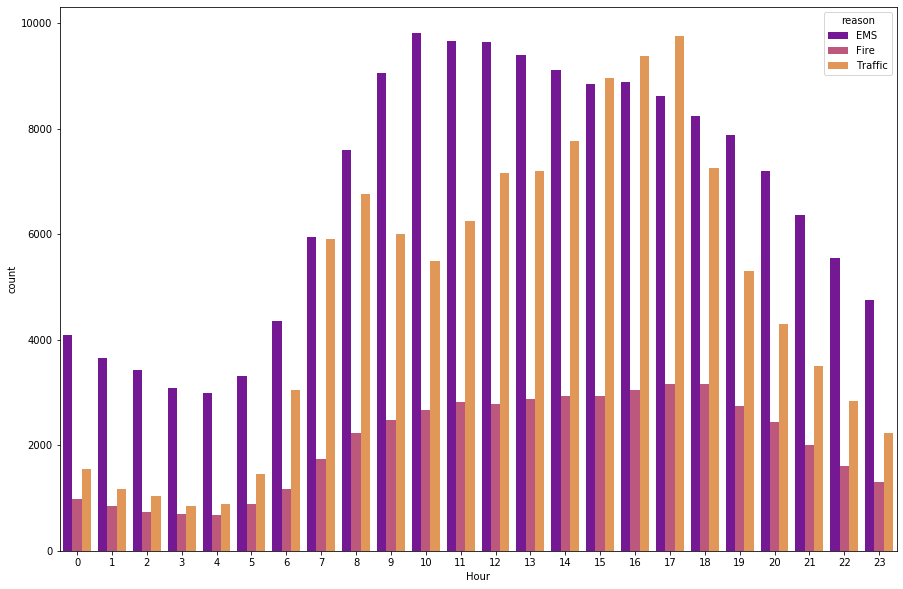

In [19]:
x_plot1 = plt.figure(figsize=(15,10))
x_plot1 = sns.countplot(x='Hour',data=df,hue='reason',palette='plasma')
print(x_plot1)

Notice how most number of calls are usually made during 4:00 - 5:00 PM. Thursday usually has less number of calls which is unusual. 